In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy.stats import zscore
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [2]:
dataset=pd.read_csv("GlobalWarming.csv")

In [3]:
dataset.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [4]:
dataset.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [5]:
def scatterplot(i,j):
    sns.regplot(data=dataset,x=i,y=j)
    plt.show()

# 1)	Find the correlations between all the variables in the dataset except Date & Month. Which of the following independent variables is N2O highly correlated with (absolute correlation greater than 0.7)? 

In [7]:
dataset1=dataset.drop(['Year','Month'],axis=1)

In [48]:
dataset1=dataset1.corr()
dataset1

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
MEI,1.000000,-0.695763,-0.717819,-0.708210,-0.510871,-0.695038,-0.343767,0.606440,-0.523402
CO2,-0.695763,1.000000,0.966421,0.999582,0.592578,0.936205,-0.230792,-0.923360,0.926002
CH4,-0.717819,0.966421,1.000000,0.969867,0.775792,0.993809,-0.139837,-0.908319,0.886081
N2O,-0.708210,0.999582,0.969867,1.000000,0.601325,0.940040,-0.217790,-0.921391,0.921673
CFC-11,-0.510871,0.592578,0.775792,0.601325,1.000000,0.837406,0.079979,-0.604559,0.530799
CFC-12,-0.695038,0.936205,0.993809,0.940040,0.837406,1.000000,-0.114560,-0.892012,0.862876
TSI,-0.343767,-0.230792,-0.139837,-0.217790,0.079979,-0.114560,1.000000,0.000354,-0.149729
Aerosols,0.606440,-0.923360,-0.908319,-0.921391,-0.604559,-0.892012,0.000354,1.000000,-0.968906
Temp,-0.523402,0.926002,0.886081,0.921673,0.530799,0.862876,-0.149729,-0.968906,1.000000


In [49]:
a=abs(dataset1['N2O'])>0.7
print(a)

MEI          True
CO2          True
CH4          True
N2O          True
CFC-11      False
CFC-12       True
TSI         False
Aerosols     True
Temp         True
Name: N2O, dtype: bool


In [50]:
y=['CO2','CH4','CFC-12','Aerosols']

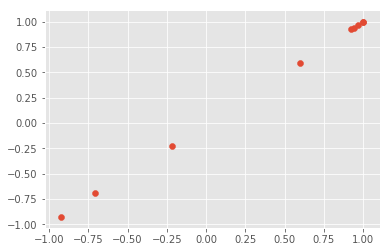

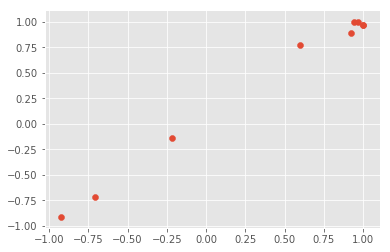

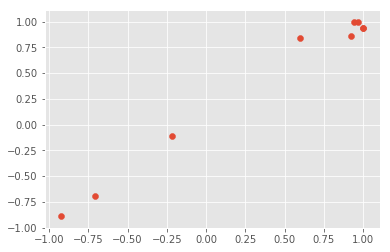

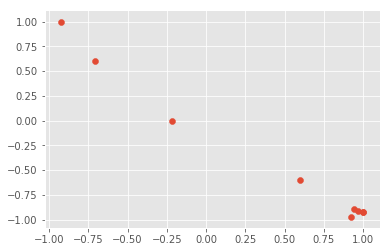

In [51]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
for i in y:
    plt.scatter(dataset1['N2O'], dataset1[i])
    plt.show()

# solution:CO2,CH4,CFC-12 

# 2)What is Multicollinearity? Does Multicollinearity exist in this Data?


Multicollinearity: If there is any relation between the independent variables then we name it as multicollinearity 
we use scatter and person correlation factor to check the multicollinearity
Here in this data multicollinearity exists and it is bad to the model

# 3)	Which variables are highly correlated with the Dependent Variable? Is Co-relation god or bad for the Model? Why?

In [52]:
abs(dataset1['Temp'])>0.7

MEI         False
CO2          True
CH4          True
N2O          True
CFC-11      False
CFC-12       True
TSI         False
Aerosols     True
Temp         True
Name: Temp, dtype: bool

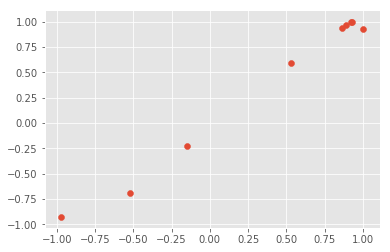

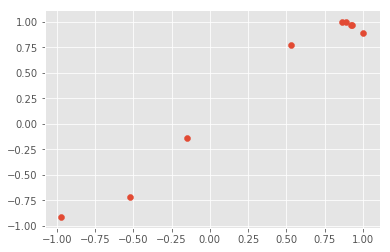

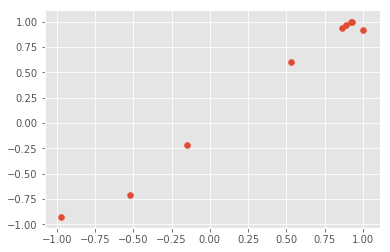

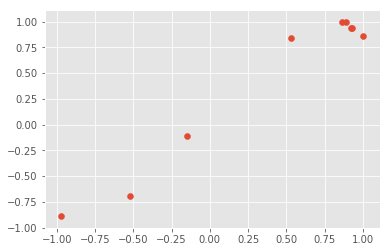

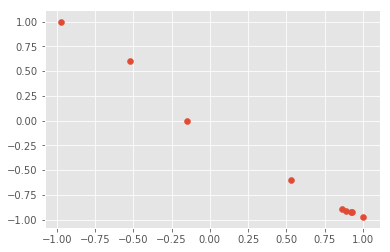

In [53]:
y=['CO2','CH4','N2O','CFC-12','Aerosols']
for i in y:
    plt.scatter(dataset1['Temp'], dataset1[i])
    plt.show()

highly correlated with the dependent variable -----Co2,Ch4,N20,CFC-12,Aerosols
here the correlation is bad  for the model because the multicollinearity exists between 

# 4)	What will be the prediction of a baseline Model? What will be its SSE, more commonly known as SST/TSS?

In [67]:
sstot = np.sum((y - ybar)**2)   
print(sstot)

9.846455542207792


By using baseline model the TSS=9.846455542207792

In [55]:
X=dataset.drop('Temp',axis=1)

In [56]:
y=dataset['Temp']

In [57]:
print(X.shape)
print(y.shape)

(308, 10)
(308,)


# 5)	Build a linear regression model to predict the dependent variable Temp, using CO2, N2O, CFC.12, and Aerosols as independent variables. Find the RMSE, SSE and MAPE for the above Model. What is the model R2 (the "Multiple R-squared" value & Adjusted R2).

In [22]:
import statsmodels.api as sm # Regression Library

c:\users\hp 8.1\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [37]:
from statsmodels.formula.api import ols
model1 = ols('Temp ~ CO2+N2O+CFC12F+Aerosols', data=dataset).fit()

In [38]:
dataset.rename(columns={'CFC-12': 'CFC12F'},inplace=True)

In [39]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     111.9
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.81e-58
Time:                        13:17:52   Log-Likelihood:                 232.93
No. Observations:                 308   AIC:                            -455.9
Df Residuals:                     303   BIC:                            -437.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9781      1.198     -2.485      0.013      -5.336      -0.620
CO2            0.0060      0.003      2.242      0.026       0.001       0.011
N2O            0.0022      0.007      0.320      0.749      -0.011       0.015
CFC12F         0.0008      0.000      3.673      0.000       0.000       0.001
Aerosols      -0.9362      0.244     -3.841      0.000      -1.416      -0.457
==============================================================================
Omnibus:                        5.792   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                6.779
Skew:                           0.181   Prob(JB):                       0.0337
Kurtosis:                       3.630   Cond. No.                     1.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
y_pred=model1.predict()

In [59]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_pred,y)
print(mae)

0.08830130912143315


In [60]:
mape=np.mean(np.abs((y - y_pred) / y)) * 100
print(mape)

159.49003764898617


In [61]:
rmse=np.sqrt(np.mean(np.abs((y - y_pred) / y)))
print(rmse)

1.262893652090255


In [62]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y)
print(mse)

0.012901885489799021




# 6)	Calculate R2 value manually using the formulae for R2. Both should match.

In [63]:
results=[]
ybar = np.sum(y)/len(y)          
ssreg = np.sum((y_pred-ybar)**2)  
sstot = np.sum((y - ybar)**2)   
results = ssreg / sstot
print(results)

0.5964252604580307


# 7)	Find the correlation between the actual & predicted values of Temp. Square this number and you should get the Multiple R2. This is another quick way to compute R2. ( R2= correlation(actual, predicted values)^2)

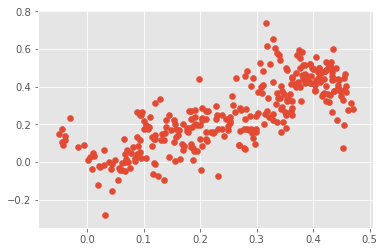

In [64]:
plt.scatter(y_pred, y)
plt.show()

In [65]:
a=np.corrcoef(y_pred,y)
print(a)

[[1.         0.77228574]
 [0.77228574 1.        ]]


In [66]:
Multiple_r2=np.square(a[0][1])
print(Multiple_r2)

0.5964252604580301


# 8)	What is the Hypothesis test in case of a Linear Regression?

Linear Regression y=Bo+B1x

we use hypothesis testing is their any significant relation between between the independent variable and dependent variable
the slope of the line will tell that information

Null Hypothesis:B1=0
Alternate Hypothesis:B1!=0

# 9)	What do the P values represent? Do we look for low or High P values? Why?

P-values describes the area under the curve.We look for values which are less than 0.05 if the values are above 0.05 we simple delete those columns based on their VIF value consideration

# 10)	What is an F Test in Linear Regression? Discuss.

F test can do multiple regression coefficients so that it helps us whether to reject the null hypothesis or fails to rejected the null hypothesis